# Hypothesis 1: 
### Counties in WA State with higher average population density tend to exhibit higher electric vehicle adoption rates.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import county as cty
import population as pop
import education as edu

In [109]:
filename = "/Users/peeyu/PycharmProjects/2024Spr_projects/datasets/ev_by_county.csv"
df_ev_by_county = cty.calc_proportion(cty.clean_county_data(cty.read_county_data(filename)))

AttributeError: module 'county' has no attribute 'clean_county_data'

In [110]:
population_filename = "/Users/peeyu/PycharmProjects/2024Spr_projects/datasets/population_data.csv"
population_data = pop.read_population_data(population_filename)
df_population = pop.calculate_average_population_density(population_data)
df_population

,County,Avg_Total_Population_Density
0,Adams,10.223478
1,Asotin,35.568261
2,Benton,109.590870
3,Chelan,26.221304
4,Clallam,42.931304
5,Clark,723.238696
6,Columbia,4.900000
7,Cowlitz,94.194348
8,Douglas,22.085652
9,Ferry,3.553043


In [111]:
merged_df = pd.merge(df_ev_by_county, df_population, on='County', how='inner')

In [112]:
merged_df

,Year,County,State,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Proportion,Avg_Total_Population_Density
0,2022,Wahkiakum,WA,0,1815,1815,0.000000,16.029565
1,2017,Adams,WA,0,5079,5079,0.000000,10.223478
2,2024,Franklin,WA,10,20616,20626,0.000485,65.573043
3,2018,Grays Harbor,WA,0,20109,20109,0.000000,39.675652
4,2018,Cowlitz,WA,129,71728,71857,0.001795,94.194348
...,...,...,...,...,...,...,...,...
6781,2017,Benton,WA,0,40165,40165,0.000000,109.590870
6782,2017,Jefferson,WA,179,24009,24188,0.007400,17.359130
6783,2022,Jefferson,WA,661,24528,25189,0.026242,17.359130
6784,2023,Adams,WA,32,13009,13041,0.002454,10.223478


In [113]:
del merged_df["State"]
del merged_df["Year"]

In [114]:
grouped_df = merged_df.groupby('County').mean().reset_index()

In [115]:
grouped_df

,County,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Proportion,Avg_Total_Population_Density
0,Adams,10.258621,9027.500000,9037.758621,0.000822,10.223478
1,Asotin,16.011494,9582.775862,9598.787356,0.001280,35.568261
2,Benton,442.965517,87990.333333,88433.298851,0.003305,109.590870
3,Chelan,205.551724,38210.022989,38415.574713,0.003838,26.221304
4,Clallam,241.034483,35664.195402,35905.229885,0.004860,42.931304
5,Clark,2077.574713,197023.488506,199101.063218,0.006593,723.238696
6,Columbia,3.206897,1983.091954,1986.298851,0.001316,4.900000
7,Cowlitz,175.948276,49899.735632,50075.683908,0.002491,94.194348
8,Douglas,73.603448,20209.729885,20283.333333,0.002615,22.085652
9,Ferry,6.408046,3968.465517,3974.873563,0.001467,3.553043


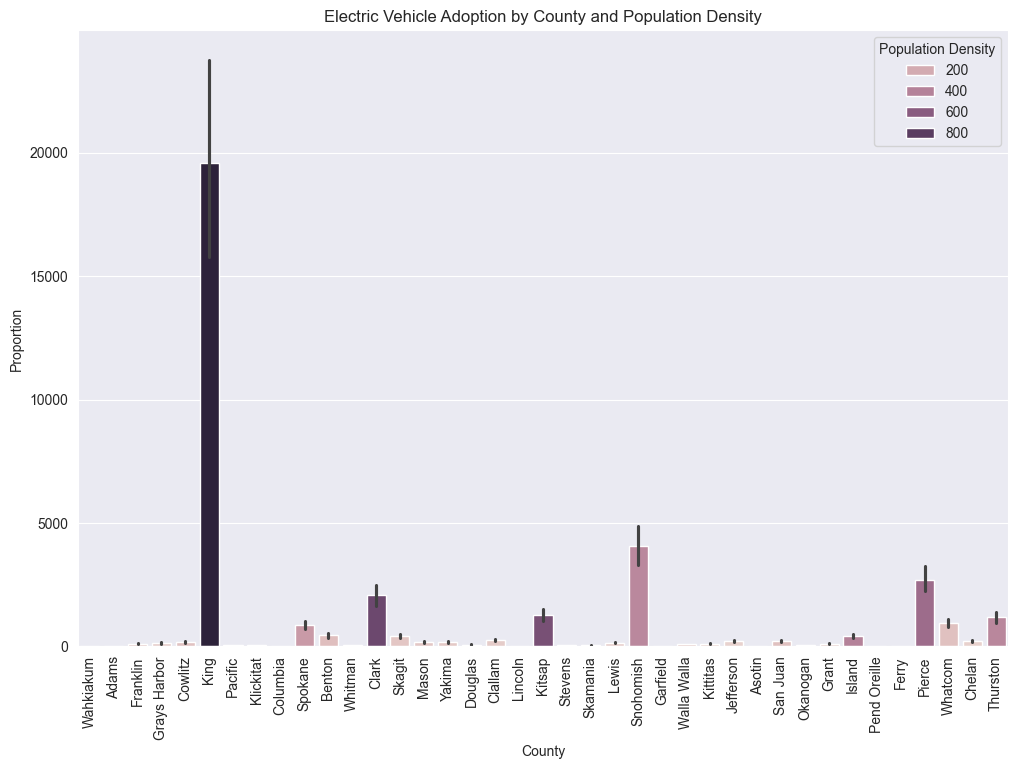

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='County', y='Electric Vehicle (EV) Total', hue='Avg_Total_Population_Density')
plt.title('Electric Vehicle Adoption by County and Population Density')
plt.xlabel('County')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Population Density')
plt.show()

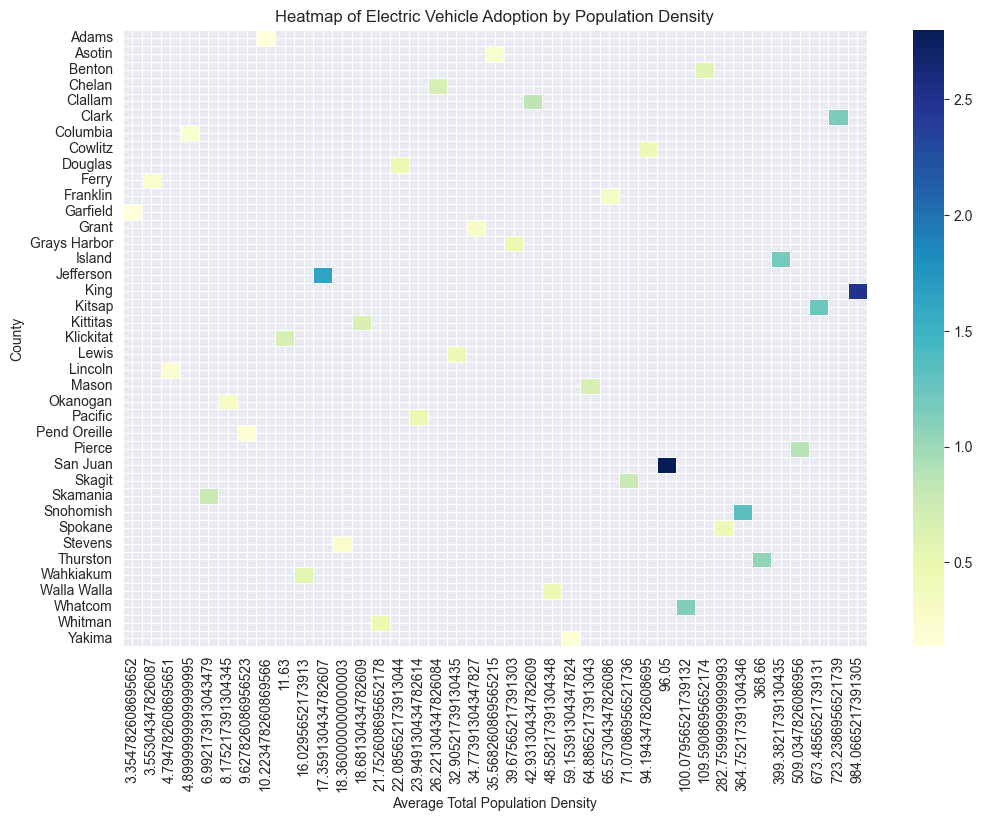

In [117]:
heatmap_data = merged_df.pivot_table(index='County', columns='Avg_Total_Population_Density', values='Proportion', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Electric Vehicle Adoption by Population Density')
plt.xlabel('Average Total Population Density')
plt.ylabel('County')
plt.show()

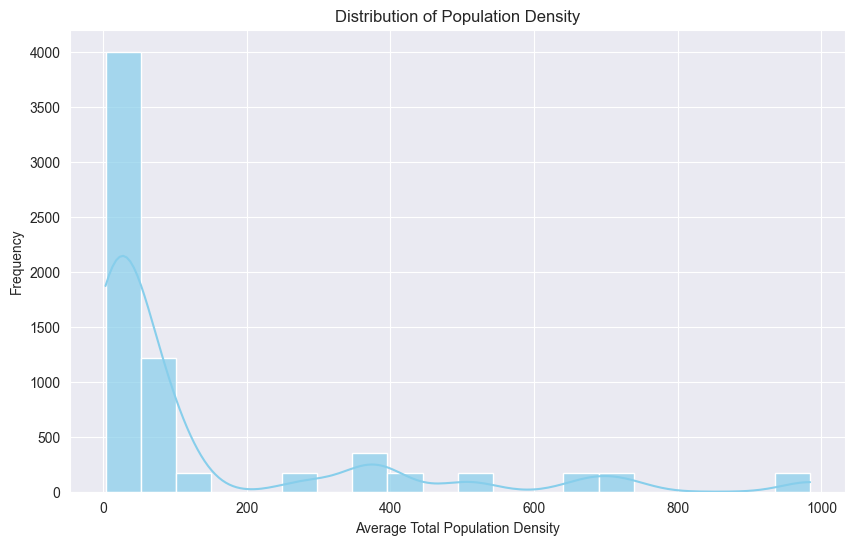

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Avg_Total_Population_Density', bins=20, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of Population Density')
plt.xlabel('Average Total Population Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Conclusion:**

1. There is a strong positive correlation between population density and electric vehicle adoption rates across the counties. Counties with higher population densities tend to have a higher proportion of electric vehicles.

2. The county with the highest electric vehicle adoption rate by a significant margin is King County, which likely corresponds to the Seattle metropolitan area. This county has a population density in the 600-800 range.

3. The heatmap shows that King and Jefferson counties have the highest levels of electric vehicle adoption relative to their population densities, indicated by the dark blue shading.

4. Most counties in Washington state have relatively low population densities, with the majority clustered around the 0-200 range, as shown in the distribution plot. These low-density counties tend to have lower electric vehicle adoption rates.

5. There are a few counties with moderate population densities in the 400-600 range, which exhibit higher electric vehicle adoption rates than the low-density counties but still lower than the high-density counties like King.

**In summary, the data suggests that electric vehicle adoption is strongly correlated with population density in Washington state, with urban and suburban areas like King County leading the way, while rural, low-density counties lag behind in electric vehicle adoption.**

*Given these points, it's reasonable to accept the hypothesis. The data shows a clear trend where counties with higher population densities tend to have higher proportion of electric vehicle adoption rates, supporting the idea of a positive correlation between population density and electric vehicle adoption in Washington state.*

# Hypothesis 4: 
### In counties where there is a higher average number of students, indicative of greater educational attainment, there will be a corresponding increase in the proportion of electric vehicle (EV) adoption. 

In [119]:
filename = "/Users/peeyu/PycharmProjects/2024Spr_projects/datasets/education_data.csv"
df_education = edu.clean_education_data(edu.read_education_data(filename))

In [120]:
merged_df2 = pd.merge(df_ev_by_county, df_education, on='County', how='inner')

In [121]:
county_avg = merged_df2.groupby('County').agg({'Number of Students': 'mean', 'Proportion': 'mean'}).reset_index()

In [122]:
county_avg

,County,Number of Students,Proportion
0,Adams,105.106796,0.000822
1,Asotin,71.797753,0.001280
2,Benton,183.602837,0.003305
3,Chelan,103.303644,0.003838
4,Clallam,96.467890,0.004860
5,Clark,160.945455,0.006593
6,Columbia,23.750000,0.001316
7,Cowlitz,124.960000,0.002491
8,Douglas,102.458333,0.002615
9,Ferry,21.402299,0.001467


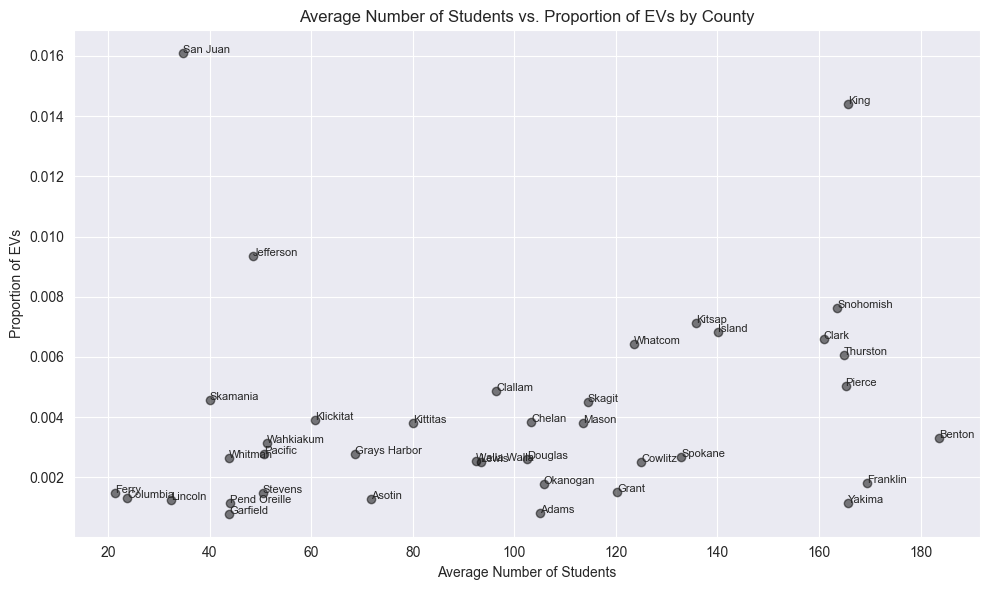

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(county_avg['Number of Students'], county_avg['Proportion'], color='black', alpha=0.5)
plt.title('Average Number of Students vs. Proportion of EVs by County')
plt.xlabel('Average Number of Students')
plt.ylabel('Proportion of EVs')
plt.grid(True)
plt.tight_layout()

for i, txt in enumerate(county_avg['County']):
    plt.annotate(txt, (county_avg['Number of Students'][i], county_avg['Proportion'][i]), fontsize=8)

plt.show()

**Conclusion:**

1. There appears to be a positive correlation between the average number of students and the proportion of EVs in a county. Counties with higher average numbers of students tend to have a higher proportion of EVs.
2. However, the correlation is not very strong or linear. While counties like King and San Juan with higher student numbers tend to have higher EV proportions, there are also counties like Jefferson with a relatively high student count but a lower EV proportion.
3. The data points are quite scattered, suggesting that there are likely other factors beyond just the student population that influence the adoption of EVs within a county. Factors like income levels, urban/rural divide, availability of charging infrastructure, and local policies could play a role.
4. A few counties like King, San Juan, and Kitsap seem to be outliers, with relatively high EV proportions compared to most other counties in the state, even after accounting for their student populations.

**In summary, while there is a general positive trend, the relationship between student population and EV adoption is not straightforward or solely determined by the number of students. Other factors likely have a significant impact, and there may be unique circumstances in certain counties that lead to higher or lower EV adoption rates.**

*Based on this analysis, it would be reasonable to accept the hypothesis to some extent. There is evidence of a positive correlation between education levels (as indicated by the number of students) and EV adoption, supporting the hypothesis. However, the relationship is not solely determined by education levels, as other factors also contribute to EV adoption rates, as observed in the scattered data points and the presence of outliers.*